# Import Libraries

In [1]:
import pandas as pd
# pd.options.mode.chained_assignment = None  # default='warn'
import datetime
import random
import importlib
import os
import sys
import json
import time
import importlib

import numpy as np
import pickle as pickle
import geopandas as gpd
import matplotlib.pyplot as plt
import osmnx as ox
import networkx as nx
# import matplotlib.dates as md

# from pprint import pprint
# from copy import deepcopy
# from scipy.stats import hmean
# from matplotlib.lines import Line2D
# from tqdm.notebook import tqdm
# random.seed()

In [4]:
fp = './UNCLEAN-RATIOS/01_2019_ratios_maxr085_gran_5_incidents_24h.pkl'
with open(fp, 'rb') as handle:
    ratio = pickle.load(handle)
print(ratio)

                     hm_441178988  am_441178988  qr_441178988  hm_449241307  \
time_local                                                                    
2019-12-31 18:00:00     44.000000        44.000      1.000000     38.470161   
2019-12-31 18:05:00     43.138454        43.155      0.999617     33.244444   
2019-12-31 18:10:00     41.904762        42.000      0.997732     33.294959   
2019-12-31 18:15:00     41.904762        42.000      0.997732     33.492537   
2019-12-31 18:20:00     40.741013        40.755      0.999657     36.311971   
...                           ...           ...           ...           ...   
2020-01-31 17:35:00     41.904762        42.000      0.997732     29.836066   
2020-01-31 17:40:00     41.904762        42.000      0.997732     31.450265   
2020-01-31 17:45:00     41.349398        41.500      0.996371     34.229680   
2020-01-31 17:50:00     41.349398        41.500      0.996371     34.229680   
2020-01-31 17:55:00     39.493671        39.500     

# Detection Report 

In [6]:
fp = '../data/maxr085_results/optimized_actual_detection_Frame_maxr085_25C_10-21-2021.pkl'
with open(fp, 'rb') as handle:
    detection_a = pickle.load(handle)
print(detection_a[detection_a['cluster_id'] == 1524532228]) # this 1524532228 was used for 
# Lagrange based method Testing 

                     cluster_id  kappa  SF  detection_type  detection_number
time                                                                        
2019-10-09 06:10:00  1524532228   0.25   3               0              48.0
2019-09-29 06:15:00  1524532228   0.25   3               0             258.0
2019-10-08 06:15:00  1524532228   0.25   3               0             210.0
2019-10-09 06:15:00  1524532228   0.25   3               0             399.0
2019-10-11 06:15:00  1524532228   0.25   3               0             242.0
...                         ...    ...  ..             ...               ...
2019-10-20 20:50:00  1524532228   2.00   9               0             276.0
2019-10-14 20:55:00  1524532228   2.00   9               0             216.0
2019-10-19 20:55:00  1524532228   2.00   9               0             100.0
2019-10-20 20:55:00  1524532228   2.00   9               0             585.0
2019-10-26 20:55:00  1524532228   2.00   9               0             295.0

In [7]:
fp2 = '../data/maxr085_results/optimized_detection_report_Frame_maxr085_25C_10-21-2021.pkl'
with open(fp2, 'rb') as handle:
    detection_r = pickle.load(handle)
print(detection_r[detection_r['cluster_id'] == 1524532228])# this 1524532228 was used for 
# Lagrange based method Testing 

                     cluster_id  kappa  SF       RUC   tau_min  tau_max
time                                                                   
2019-12-01 06:45:00  1524532228   0.25   9 -0.352165 -0.348643      NaN
2019-12-02 06:45:00  1524532228   0.25   9 -0.606531 -0.348643      NaN
2019-12-03 06:45:00  1524532228   0.25   9 -0.733895 -0.348643      NaN
2019-12-04 06:45:00  1524532228   0.25   9 -0.377246 -0.348643      NaN
2019-12-05 06:45:00  1524532228   0.25   9 -0.680684 -0.348643      NaN
...                         ...    ...  ..       ...       ...      ...
2019-10-26 20:55:00  1524532228   0.25   9 -0.881801 -0.348643      NaN
2019-10-27 20:55:00  1524532228   0.25   9 -0.420044 -0.348643      NaN
2019-10-28 20:55:00  1524532228   0.25   9 -0.403955 -0.348643      NaN
2019-10-29 20:55:00  1524532228   0.25   9 -0.673522 -0.348643      NaN
2019-10-31 20:55:00  1524532228   0.25   9 -0.518533 -0.348643      NaN

[11081 rows x 6 columns]


In [4]:
fp2 = '../data/maxr085_results/optimized_detection_report_maxr085_25C_10-21-2021.pkl'
with open(fp2, 'rb') as handle:
    detection_r = pickle.load(handle)
print(detection_r)

                     cluster_id  kappa  SF       RUC   tau_min  tau_max
time                                                                   
2019-09-16 06:15:00   429356410   0.25   3 -0.106304 -0.088395      NaN
2019-09-23 06:15:00   429356410   0.25   3 -0.139536 -0.088395      NaN
2019-09-27 06:15:00   429356410   0.25   3 -0.111439 -0.088395      NaN
2019-10-12 06:15:00   429356410   0.25   3  0.126531       NaN   0.0825
2019-10-19 06:15:00   429356410   0.25   3  0.111952       NaN   0.0825
...                         ...    ...  ..       ...       ...      ...
2019-10-20 20:55:00  1524532228   2.00   7 -0.265886 -0.172617      NaN
2019-10-14 20:55:00  1524532228   2.00   9 -0.205042 -0.185560      NaN
2019-10-19 20:55:00  1524532228   2.00   9 -1.006726 -0.185560      NaN
2019-10-20 20:55:00  1524532228   2.00   9 -0.265886 -0.185560      NaN
2019-10-26 20:55:00  1524532228   2.00   9 -0.205772 -0.185560      NaN

[1151957 rows x 6 columns]


# Train Data Prepare

In [2]:
fp = '../data/maxr085_results/optimized_residual_train_maxr085_25C_10-21-2021.pkl'
with open(fp, 'rb') as handle:
    train_residual = pickle.load(handle)
print(train_residual.keys())

dict_keys([429356410, 1524555699, 1524274521, 1524373007, 1524471255, 1524476318, 441419752, 1524518468, 1524476847, 1524534201, 1524394465, 429359943, 1524469329, 1524423643, 429334678, 429334753, 1524553047, 441552718, 449617601, 1524393544, 160836160, 1524402419, 1524587754, 429334799, 1524532228])


In [3]:
"""
Saving Dictionary Data into Dataframe 
"""
Data_frame =[]
for cluster_id in train_residual.keys():
    print(cluster_id,' ',len(train_residual[cluster_id]))
    for kappa in train_residual[cluster_id].keys():
#         print(kappa,' ',len(train_residual[cluster_id][kappa]))
        for sliding_frame in train_residual[cluster_id][kappa].keys():
#             print(sliding_frame,' ',len(train_residual[cluster_id][kappa][sliding_frame]))
#             print((train_residual[cluster_id][kappa][sliding_frame]))
            _df_temp = pd.DataFrame(train_residual[cluster_id][kappa][sliding_frame].items(),columns = ['time','RUC'])
            _df_temp['kappa'] = kappa
            _df_temp['cluster_ID'] = cluster_id
            _df_temp['sliding_frame'] = sliding_frame
            Data_frame.append(_df_temp)
#             print(_df_temp)
#             break
#         break
    break
print(len(Data_frame))

429356410   8
1524555699   8
1524274521   8
1524373007   8
1524471255   8
1524476318   8
441419752   8
1524518468   8
1524476847   8
1524534201   8
1524394465   8
429359943   8
1524469329   8
1524423643   8
429334678   8
429334753   8
1524553047   8
441552718   8
449617601   8
1524393544   8
160836160   8
1524402419   8
1524587754   8
429334799   8
1524532228   8
800


In [4]:
result_frame = pd.concat(Data_frame,ignore_index = True)

In [5]:
result_frame.to_csv('train.csv')

# Learned Hyper Paramerters for different cluster 
Hyper parameters are cluster id kappa and SF

In [6]:
fp = '../data/maxr085_results/optimized_hyper_mapping_maxr085_25C_10-21-2021.pkl'
with open(fp, 'rb') as handle:
    hyper_param = pickle.load(handle)

In [7]:
hyper_param

{160836160: {'kappa': 0.25, 'SF': 7},
 429334678: {'kappa': 0.25, 'SF': 3},
 429334753: {'kappa': 0.25, 'SF': 5},
 429334799: {'kappa': 0.25, 'SF': 3},
 429356410: {'kappa': 0.25, 'SF': 3},
 429359943: {'kappa': 0.25, 'SF': 3},
 441419752: {'kappa': 0.25, 'SF': 7},
 441552718: {'kappa': 0.25, 'SF': 3},
 449617601: {'kappa': 0.25, 'SF': 7},
 1524274521: {'kappa': 0.25, 'SF': 3},
 1524373007: {'kappa': 0.25, 'SF': 3},
 1524393544: {'kappa': 0.25, 'SF': 3},
 1524394465: {'kappa': 0.25, 'SF': 9},
 1524402419: {'kappa': 0.25, 'SF': 9},
 1524423643: {'kappa': 0.25, 'SF': 7},
 1524469329: {'kappa': 0.25, 'SF': 7},
 1524471255: {'kappa': 0.25, 'SF': 9},
 1524476318: {'kappa': 0.25, 'SF': 9},
 1524476847: {'kappa': 0.25, 'SF': 3},
 1524518468: {'kappa': 0.25, 'SF': 9},
 1524532228: {'kappa': 0.25, 'SF': 9},
 1524534201: {'kappa': 0.25, 'SF': 7},
 1524553047: {'kappa': 0.25, 'SF': 3},
 1524555699: {'kappa': 0.25, 'SF': 3},
 1524587754: {'kappa': 0.25, 'SF': 9}}

# Test Data Prepare 2 from November and December

In [8]:
fpp = '../data/maxr085_results/optimized_test_residual_maxr085_25C_10-21-2021.pkl'
with open(fpp, 'rb') as handle:
    test_residual = pickle.load(handle)
print(test_residual.keys())

dict_keys([429356410, 1524555699, 1524274521, 1524373007, 1524471255, 1524476318, 441419752, 1524518468, 1524476847, 1524534201, 1524394465, 429359943, 1524469329, 1524423643, 429334678, 429334753, 1524553047, 441552718, 449617601, 1524393544, 160836160, 1524402419, 1524587754, 429334799, 1524532228])


# The following Testing Residual is between month 10 and 12 

In [9]:
fpp = '../data/maxr085_results/optimized_residual_Test_QR_maxr085_25C_10-21-2021.pkl'
with open(fpp, 'rb') as handle:
    test_residual = pickle.load(handle)
print(test_residual.keys())

dict_keys([160836160, 429334678, 429334753, 429334799, 429356410, 429359943, 441419752, 441552718, 449617601, 1524274521, 1524373007, 1524393544, 1524394465, 1524402419, 1524423643, 1524469329, 1524471255, 1524476318, 1524476847, 1524518468, 1524532228, 1524534201, 1524553047, 1524555699, 1524587754])


# 1524532228 this cluster is used for Lagrange based poisoning test 

In [11]:
test_res_1524532228 = pd.DataFrame(test_residual[1524532228][0.25][9].items(), columns=['time', 'RUC'])

In [13]:
test_res_1524532228.to_csv('test_res_1524532228.csv')

# If want to save all test data into pandas frame

In [ ]:
for cluster_id in test_residual.keys():
    print(cluster_id,' ',len(train_residual[cluster_id]))
    Data_frame =[]
    for kappa in test_residual[cluster_id].keys():
#         print(kappa,' ',len(train_residual[cluster_id][kappa]))
        for sliding_frame in test_residual[cluster_id][kappa].keys():
#             print(sliding_frame,' ',len(train_residual[cluster_id][kappa][sliding_frame]))
#             print((train_residual[cluster_id][kappa][sliding_frame]))
            _df_temp = pd.DataFrame(test_residual[cluster_id][kappa][sliding_frame].items(),columns = ['time','RUC'])
            _df_temp['kappa'] = kappa
            _df_temp['cluster_ID'] = cluster_id
            _df_temp['sliding_frame'] = sliding_frame
            Data_frame.append(_df_temp)
            print(_df_temp)
#             break
#         break
    break

print(len(Data_frame))
result_frame_test = pd.concat(Data_frame, ignore_index=True)
result_frame_test.to_csv('test2.csv')

# Optimal Hyper Parameter Learned

In [2]:
fp = '../data/maxr085_results/optimized_hyper_mapping_maxr085_25C_10-21-2021.pkl'
with open(fp, 'rb') as handle:
    hyper_param = pickle.load(handle)

# Filtered Sample Train and Test Data

In [9]:
train_frame = pd.read_csv('train.csv')
test_frame  = pd.read_csv('test.csv')
train_frame_pruned = train_frame[train_frame['kappa']<=1.00]
test_frame_pruned = test_frame[test_frame['kappa']<=1.00]

In [10]:
# print(train_frame_pruned)
train_frame_pruned.to_csv('train_P.csv')
# print(test_frame_pruned)
test_frame_pruned.to_csv('test_P.csv')


# Safe Margin with Ratio Plot

In [2]:
incident_ratio_path = '../data/generated_clusters/maxr085_incident_ratios/01_2019_ratios_maxr085_gran_5_incidents_24h.pkl'
safe_margin_path = '../data/maxr085_results/optimized_safe_margin_maxr085_25C_10-21-2021.pkl'

In [3]:
with open(incident_ratio_path, 'rb') as handle:
    incident_ratio = pickle.load(handle)
with open(safe_margin_path, 'rb') as handle:
    safe_margin = pickle.load(handle)

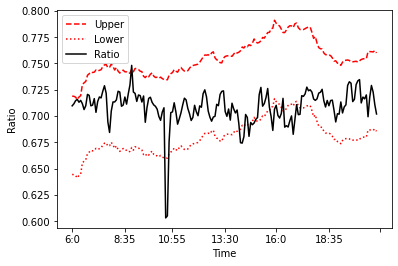

In [54]:
from datetime import datetime
import matplotlib.dates as mdates

for cluster_id in safe_margin.keys():
    for kappa in safe_margin[cluster_id].keys():
        safe_upper = safe_margin[cluster_id][1.0]['upper'].values()
        safe_lower = safe_margin[cluster_id][1.0]['lower'].values()
        temp = incident_ratio[(incident_ratio.index.day==1) &
                             (incident_ratio.index.hour>=6) & 
                             (incident_ratio.index.hour<21)]
        hour_min_index = temp.index.to_series().apply(lambda x: str(x.hour)+":"+str(x.minute)).to_list()
#         print(hour_min_index)
        ratio_list = incident_ratio[(incident_ratio.index.day==1) &
                             (incident_ratio.index.hour>=6) & 
                             (incident_ratio.index.hour<21)]['qr_'+str(cluster_id)].to_list()
        
#         print(len(safe_margin[cluster_id][1.0]['upper'].keys()))
        ax = plt.axes()
        ax.plot(hour_min_index,safe_upper,label ='Upper',color = 'r',linestyle = '--')
        ax.plot(hour_min_index,safe_lower,label='Lower',color = 'r',linestyle =':')
        ax.plot(hour_min_index,ratio_list,label='Ratio',color = 'k')
        ax.set_xlabel('Time')
        ax.set_ylabel('Ratio')
        ax.xaxis.set_major_locator(mdates.AutoDateLocator())
#         ax.xaxis.set_major_formatter(mdates.AutoDateFormatter())
        plt.legend()
        plt.show()

#         pass
        break
    break

# Ground Truth Information

In [14]:
ground_truth_data_path  =  "../data/generated_clusters/maxr085_incident_ratios/incidents_GT"

In [15]:
files_GT = os.listdir(ground_truth_data_path)
incident_GT = []
i = 0
while i< len(files_GT):
    fp = os.path.join(ground_truth_data_path, files_GT[i])
    with open(fp, 'rb') as handle:
        incident_GT.append( pickle.load(handle))
    i+=1
incident_GT_Frame = pd.concat(incident_GT)

In [17]:
incident_GT_Frame[incident_GT_Frame['cluster_head'] == 1524532228].to_csv('ground_truth_1524532228.csv')

In [11]:
# temp = incident_GT_Frame[incident_GT_Frame['cluster_head'] == 429356410]
# temp.to_csv('ground_truth.csv')

# Road Network infor

In [3]:
road_net = "../data/inrix_grouped.pkl"

with open(road_net, 'rb') as handle:
    road_net_data = pickle.load(handle)
print(road_net_data[['XDSegID','PreviousXD','NextXDSegI']])

C:\Users\jami1\anaconda3\envs\detection\lib\site-packages\pyproj\crs\crs.py:280: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  projstring = _prepare_from_string(projparams)


            XDSegID    PreviousXD    NextXDSegI
0      1.368945e+08           NaN           NaN
1      1.368943e+08           NaN           NaN
2      1.368987e+08           NaN           NaN
3      1.368989e+08  1.375612e+08           NaN
4      1.369302e+08           NaN           NaN
...             ...           ...           ...
79185  1.524647e+09           NaN           NaN
79186  1.524647e+09  1.524647e+09  1.524647e+09
79187  1.524647e+09  1.524647e+09  1.600123e+08
79188  1.524647e+09  4.293509e+08  1.524551e+09
79189  1.524647e+09  1.524645e+09  1.524647e+09

[79190 rows x 3 columns]


In [3]:
cluster = "../data/generated_clusters/optimized_clustering_0.7_0.85_maxr085_all.pkl"
with open(cluster, 'rb') as handle:
    cluster_data = pickle.load(handle)

In [6]:
len(cluster_data[1524532228])

60